In [2]:
pip install optuna

     |████████████████████████████████| 308 kB 1.3 MB/s eta 0:00:01
     |████████████████████████████████| 210 kB 1.3 MB/s eta 0:00:01
     |████████████████████████████████| 81 kB 1.5 MB/s eta 0:00:011
     |████████████████████████████████| 146 kB 1.4 MB/s eta 0:00:01
     |████████████████████████████████| 113 kB 1.4 MB/s eta 0:00:01
     |████████████████████████████████| 49 kB 9.9 MB/s  eta 0:00:01
     |████████████████████████████████| 78 kB 1.4 MB/s eta 0:00:011
  Created wheel for pyperclip: filename=pyperclip-1.8.2-py3-none-any.whl size=11107 sha256=dc028052fe2a9d325b300970dc325babc6c935d867736166a87338d4d6c269cc
  Stored in directory: /home/ubuntu/.cache/pip/wheels/7f/1a/65/84ff8c386bec21fca6d220ea1f5498a0367883a78dd5ba6122
Successfully built pyperclip
Note: you may need to restart the kernel to use updated packages.


In [33]:
import datetime
from packaging import version
from collections import Counter
import numpy as np
import pandas as pd

import matplotlib as mpl  # EA
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import accuracy_score

import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow import keras
from tensorflow.keras import models, datasets, layers, losses, Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt

import optuna
from functools import partial
from keras.applications.vgg16 import VGG16
from keras.utils import  plot_model

In [34]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()


In [35]:
x_train_og = x_train
x_test_og = x_test

In [36]:
x_train = tf.pad(x_train, [[0, 0], [2,2], [2,2]])/255
x_test = tf.pad(x_test, [[0, 0], [2,2], [2,2]])/255
x_train = tf.expand_dims(x_train, axis=3, name=None)
x_test = tf.expand_dims(x_test, axis=3, name=None)
x_train = tf.repeat(x_train, 3, axis=3)
x_test = tf.repeat(x_test, 3, axis=3)
x_val = x_train[-2000:,:,:,:]
y_val = y_train[-2000:]
x_train = x_train[:-2000,:,:,:]
y_train = y_train[:-2000]

In [37]:
y_train.shape

(58000,)

In [44]:
base_model = tf.keras.applications.ResNet50(weights = 'imagenet', include_top = False, input_shape = (32,32,3))
for layer in base_model.layers:
  layer.trainable = False

94773248/94765736 [==============================] - 5s 0us/step


In [45]:
x = layers.Flatten()(base_model.output)
x = layers.Dense(1000, activation='relu')(x)
predictions = layers.Dense(10, activation = 'softmax')(x)

In [46]:
head_model = Model(inputs = base_model.input, outputs = predictions)
head_model.compile(optimizer='adam', loss=losses.sparse_categorical_crossentropy, metrics=['accuracy'])

In [47]:
history = head_model.fit(x_train, y_train, batch_size=64, epochs=40, validation_data=(x_val, y_val))

Epoch 1/40
907/907 [==============================] - 9s 10ms/step - loss: 0.5835 - accuracy: 0.8138 - val_loss: 0.2908 - val_accuracy: 0.9100
Epoch 2/40
907/907 [==============================] - 8s 9ms/step - loss: 0.3456 - accuracy: 0.8882 - val_loss: 0.2030 - val_accuracy: 0.9455
Epoch 3/40
907/907 [==============================] - 8s 9ms/step - loss: 0.2981 - accuracy: 0.9020 - val_loss: 0.2710 - val_accuracy: 0.9190
Epoch 4/40
907/907 [==============================] - 8s 9ms/step - loss: 0.2746 - accuracy: 0.9099 - val_loss: 0.2177 - val_accuracy: 0.9340
Epoch 5/40
907/907 [==============================] - 8s 9ms/step - loss: 0.2539 - accuracy: 0.9174 - val_loss: 0.1424 - val_accuracy: 0.9605
Epoch 6/40
907/907 [==============================] - 8s 9ms/step - loss: 0.2349 - accuracy: 0.9224 - val_loss: 0.1619 - val_accuracy: 0.9520
Epoch 7/40
907/907 [==============================] - 8s 8ms/step - loss: 0.2301 - accuracy: 0.9250 - val_loss: 0.2067 - val_accuracy: 0.9325
Epoch

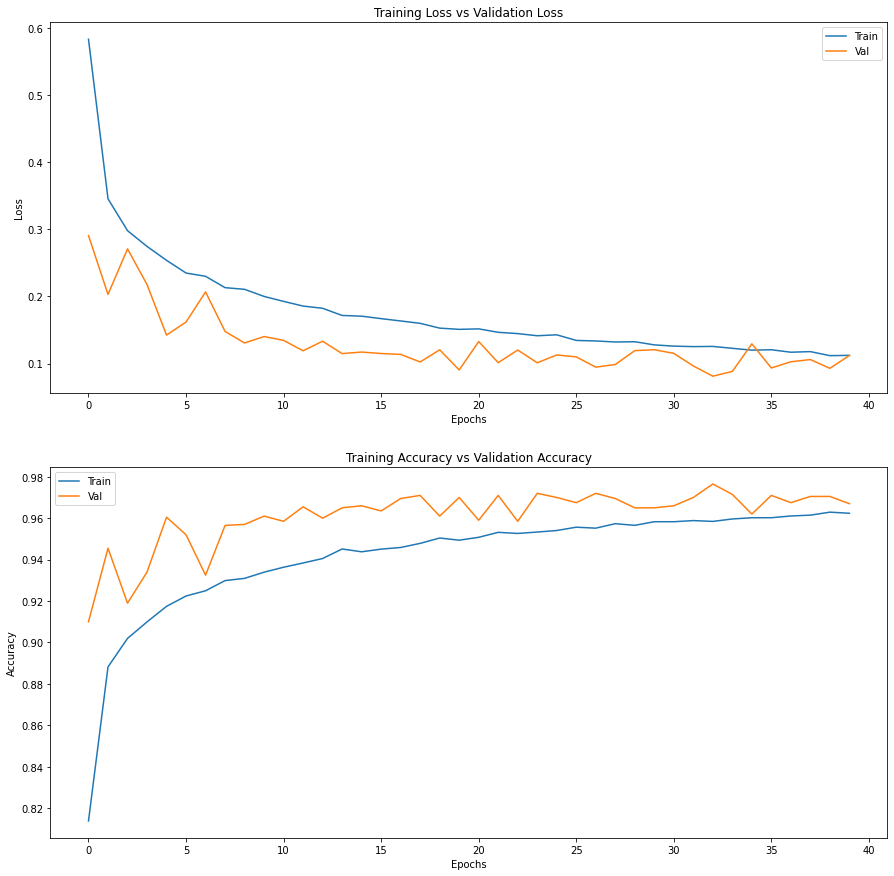

In [49]:
fig, axs = plt.subplots(2, 1, figsize=(15,15))
axs[0].plot(history.history['loss'])
axs[0].plot(history.history['val_loss'])
axs[0].title.set_text('Training Loss vs Validation Loss')
axs[0].set_xlabel('Epochs')
axs[0].set_ylabel('Loss')
axs[0].legend(['Train','Val'])
axs[1].plot(history.history['accuracy'])
axs[1].plot(history.history['val_accuracy'])
axs[1].title.set_text('Training Accuracy vs Validation Accuracy')
axs[1].set_xlabel('Epochs')
axs[1].set_ylabel('Accuracy')
axs[1].legend(['Train', 'Val'])

In [50]:
head_model.evaluate(x_test, y_test)

313/313 [==============================] - 2s 7ms/step - loss: 0.1431 - accuracy: 0.9563


[0.14309263229370117, 0.9563000202178955]